<a href="https://colab.research.google.com/github/sanjaycodes007/Paper-implementation/blob/main/MNIST_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
#converting images to tensor and optimising
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the grayscale images
])

In [ ]:
#extracting training and testing data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [ ]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

Number of training samples: 60000
Number of test samples: 10000


In [ ]:
#now writing the neural network
class helloworldmodel(nn.Module):
  def __init__(self):
        super(helloworldmodel, self).__init__()
        self.layer1=nn.Linear(784,512)
        #self.layer2=nn.Linear(128,64)
        #self.layer3=nn.Linear(64,32)
        self.output=nn.Linear(512,10)

  #defining fwd functions
  def forward(self, x):
    x = x.view(-1, 28*28) #shapes tensor
    x = torch.relu(self.layer1(x))
    #x = torch.relu(self.layer2(x))
    #x=torch.relu(self.layer3(x))
    x = self.output(x)
    return x




In [ ]:
#initializing important functions
#loss function since its classification we use cross entropy instead of MAE, cross entropy outputs a probability, which makes a lot more sense for classification
loss_function = nn.CrossEntropyLoss()

#model function
model = helloworldmodel()

#optimisation function
optimizer = optim.Adam(model.parameters(), lr=0.001)

 epoch 1, loss: 0.3187
 epoch 2, loss: 0.0977
 epoch 3, loss: 0.0822
 epoch 4, loss: 0.0971


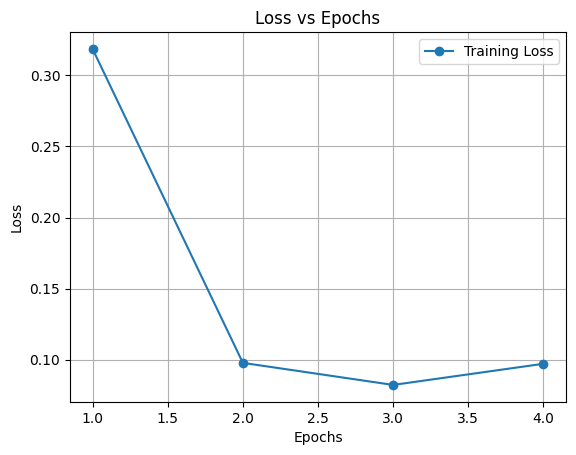

In [ ]:
#now constructing training loop
torch.manual_seed(42)
epochs=4
epoch_losses = []
for i in range(epochs):
   for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = loss_function(outputs, labels)

        #optimiser to start gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

   print(f' epoch {i+1}, loss: {loss.item():.4f}')
   epoch_losses.append(loss.item())

plt.plot(range(1, epochs + 1), epoch_losses, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


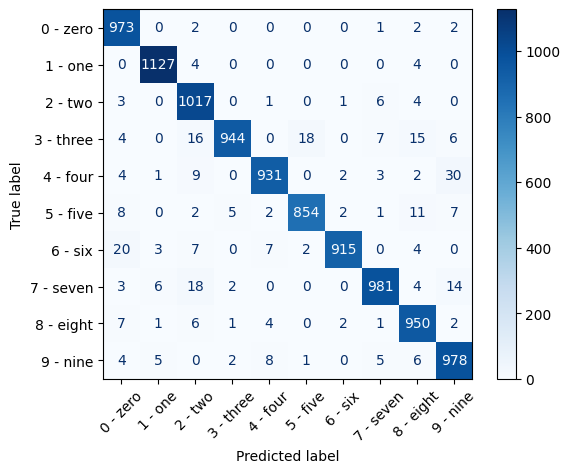

Test Accuracy: 96.70%


In [ ]:
model.eval()
correct = 0
total = 0
true_labels = []
predicted_labels = []
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images) #returns logit scores(probility) for 0-9
        _, predicted = torch.max(outputs.data, 1)# gives index of maximum score. This is the models 'prediction'
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels.extend(labels.numpy())  # Convert tensor to NumPy array and extend
        predicted_labels.extend(predicted.numpy())
cm = confusion_matrix(true_labels, predicted_labels)
classes = test_dataset.classes  # Fashion-MNIST class names

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Probability of being 0: 0.0000
Probability of being 1: 0.0000
Probability of being 2: 0.0000
Probability of being 3: 0.0001
Probability of being 4: 0.0000
Probability of being 5: 0.9999
Probability of being 6: 0.0000
Probability of being 7: 0.0000
Probability of being 8: 0.0000
Probability of being 9: 0.0000


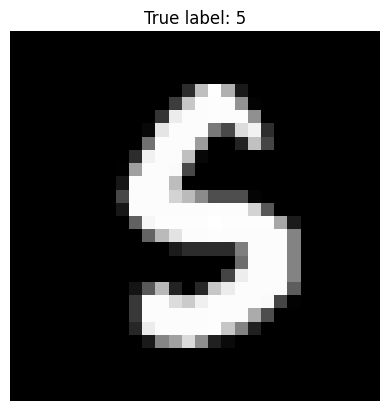

In [ ]:
#proof of model working
import matplotlib.pyplot as plt
def get_probabilities(image):
    model.eval()
    with torch.no_grad():
        image = image.view(-1,784)
        logits = model(image)  # Forward pass
        probabilities = torch.softmax(logits, dim=1)  # Convert logits to probabilities
        return probabilities

# Test on a sample from the test set
test_image, test_label = test_dataset[955]  # Get the image
test_image = test_image.unsqueeze(0)  # Add batch dimension

probabilities = get_probabilities(test_image)

# Print probabilities for digits 1-9
for digit in range(0, 10):
    print(f'Probability of being {digit}: {probabilities[0][digit].item():.4f}')

# Optionally display the image
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f'True label: {test_label}')
plt.axis('off')
plt.show()
